# AHV

Die Daten wurden am 18. Februar 2024 via die Seite des Bundesamtes für
Statistik zur
[Altersverteilung](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-0102030000_101/-/px-x-0102030000_101.px/)
zusammengestellt.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv("../data/240218_bevoelkerung_entwicklung.csv", sep=",")  
print(df.head(5))  

           Geschlecht          Alter     1948     1970     2022
0  Geschlecht - Total  Alter - Total  4611200  6193064  8815385
1  Geschlecht - Total        0 Jahre    85100    95953    80839
2  Geschlecht - Total         1 Jahr    84658    96764    89890
3  Geschlecht - Total        2 Jahre    85542    99696    86673
4  Geschlecht - Total        3 Jahre    84772   100982    87633


Der gesammte DataFrame wird nach Geschlechtern aufgeteilt.

In [22]:
df_maenner = df.loc[df['Geschlecht'] == 'Mann']
df_frauen = df.loc[df['Geschlecht'] == 'Frau']
print(df_maenner.head(5))
print(df_maenner.tail(5))
print(df_frauen.head(5))

    Geschlecht          Alter     1948     1970     2022
101       Mann  Alter - Total  2224700  3025330  4379953
102       Mann        0 Jahre    43400    49181    41714
103       Mann         1 Jahr    43378    49113    46068
104       Mann        2 Jahre    43695    50969    44637
105       Mann        3 Jahre    43519    51416    44875
    Geschlecht              Alter  1948  1970  2022
197       Mann           95 Jahre    31   116  1530
198       Mann           96 Jahre    23    69  1076
199       Mann           97 Jahre    13    35   718
200       Mann           98 Jahre    11    18   443
201       Mann  99 Jahre und mehr     8    24   619
    Geschlecht          Alter     1948     1970     2022
202       Frau  Alter - Total  2386500  3167734  4435432
203       Frau        0 Jahre    41700    46772    39125
204       Frau         1 Jahr    41280    47651    43822
205       Frau        2 Jahre    41847    48727    42036
206       Frau        3 Jahre    41253    49566    42758


Die Alter werden in Tranchen von drei Jahren zusammengefasst.

In [23]:
alter = ['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14', '15 - 17', '18 - 20', '21 - 23', '24 - 26', '27 - 29', '30 - 32', '33 - 35', '36 - 38', '39 - 41', '42 - 44', '45 - 47', '48 - 50', '51 - 53', '54 - 56', '57 - 59', '60 - 62', '63 - 65', '66 - 68', '69 - 71', '72 - 74', '75 - 77', '78 - 80', '81 - 83', '84 - 86', '87 - 89', '90 - 92', '93 - 95', '96 - 98', '99 +']

In [24]:
def summe_in_dreierschritten(df, spalte):
    summenliste = []
    for i in range(1, len(df), 3):
        summe = df[spalte][i:i+3].sum()
        summenliste.append(summe)
    return summenliste


In [25]:
maenner_gruppiert_1948 = summe_in_dreierschritten(df_maenner, '1948')
maenner_gruppiert_1970 = summe_in_dreierschritten(df_maenner, '1970')
maenner_gruppiert_2022 = summe_in_dreierschritten(df_maenner, '2022')
frauen_gruppiert_1948 =  summe_in_dreierschritten(df_frauen, '1948')
frauen_gruppiert_1970 =  summe_in_dreierschritten(df_frauen, '1970')
frauen_gruppiert_2022 =  summe_in_dreierschritten(df_frauen, '2022')

In [26]:
print(len(alter))
print(len(maenner_gruppiert_1948))

34
34


...und wieder in einem DataFrame zusammengefasst.

In [27]:
gruppierte_daten = pd.DataFrame({'Alter': alter, 'Maenner 1948': maenner_gruppiert_1948, 'Maenner 1970': maenner_gruppiert_1970, 'Maenner 2022': maenner_gruppiert_2022, 'Frauen 1948': frauen_gruppiert_1948, 'Frauen 1970': frauen_gruppiert_1970, 'Frauen 2022': frauen_gruppiert_2022})
print(gruppierte_daten.head(5))

     Alter  Maenner 1948  Maenner 1970  Maenner 2022  Frauen 1948  \
0    0 - 2        130473        149263        132419       124827   
1    3 - 5        125763        158030        136699       120487   
2    6 - 8        104458        156990        139476       101664   
3   9 - 11         92394        145702        136801        89397   
4  12 - 14         96012        141101        136110        92625   

   Frauen 1970  Frauen 2022  
0       143150       124983  
1       151580       129992  
2       151615       132087  
3       141036       128964  
4       135620       129230  


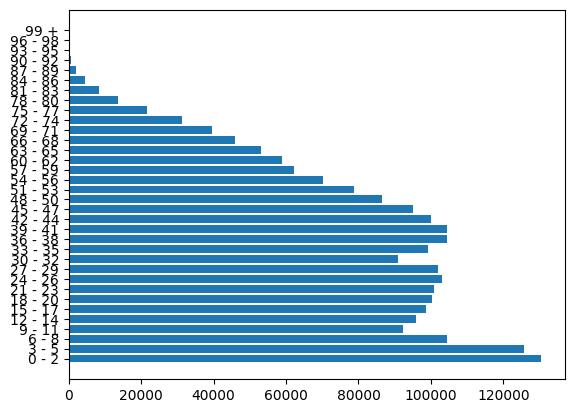

In [30]:
plt.barh(gruppierte_daten['Alter'], gruppierte_daten['Maenner 1948'], label='Männer 1948')
plt.show()

Die Altersgruppen werden in Prozenten der Gesamtbevölkerung ausgedrückt.

In [73]:
gruppierte_daten['m 1948 rel'] = gruppierte_daten['Maenner 1948'] / df['1948'][0] * -100
gruppierte_daten['m 48 rel 70'] = gruppierte_daten['Maenner 1948'] / df['1970'][0] * -100
gruppierte_daten['m 48 rel 22'] = gruppierte_daten['Maenner 1948'] / df['2022'][0] * -100
gruppierte_daten['m 70 rel 22'] = gruppierte_daten['Maenner 1970'] / df['2022'][0] * -100
gruppierte_daten['m 1970 rel'] = gruppierte_daten['Maenner 1970'] / df['1970'][0] * -100
gruppierte_daten['m 2022 rel'] = gruppierte_daten['Maenner 2022'] / df['2022'][0] * -100
gruppierte_daten['f 1948 rel'] = gruppierte_daten['Frauen 1948']  / df['1948'][0] * 100
gruppierte_daten['f 48 rel 70'] = gruppierte_daten['Frauen 1948']  / df['1970'][0] * 100
gruppierte_daten['f 48 rel 22'] = gruppierte_daten['Frauen 1948'] / df['2022'][0] * 100
gruppierte_daten['f 70 rel 22'] = gruppierte_daten['Frauen 1970'] / df['2022'][0] * 100
gruppierte_daten['f 1970 rel'] = gruppierte_daten['Frauen 1970']  / df['1970'][0] * 100
gruppierte_daten['f 2022 rel'] = gruppierte_daten['Frauen 2022']  / df['2022'][0] * 100
print(gruppierte_daten.to_string())

      Alter  Maenner 1948  Maenner 1970  Maenner 2022  Frauen 1948  Frauen 1970  Frauen 2022  m 1948 rel  m 1970 rel  m 2022 rel  f 1948 rel  f 1970 rel  f 2022 rel  m 48 rel 70  f 48 rel 70  m 48 rel 22  m 70 rel 22  f 48 rel 22  f 70 rel 22
0     0 - 2        130473        149263        132419       124827       143150       124983   -2.829480   -2.410164   -1.502135    2.707039    2.311457    1.417783    -2.106760     2.015594    -1.480060    -1.693210     1.416013     1.623866
1     3 - 5        125763        158030        136699       120487       151580       129992   -2.727338   -2.551726   -1.550687    2.612921    2.447577    1.474604    -2.030707     1.945515    -1.426631    -1.792661     1.366781     1.719494
2     6 - 8        104458        156990        139476       101664       151615       132087   -2.265311   -2.534933   -1.582188    2.204719    2.448142    1.498369    -1.686693     1.641578    -1.184951    -1.780864     1.153256     1.719891
3    9 - 11         92394   

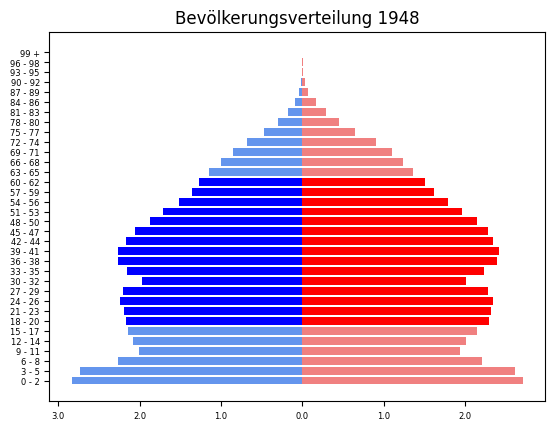

In [56]:
plt.rcParams.update({'font.size': 6})   # legt die generelle Schriftgrösse fest
farben_m = ['cornflowerblue' if idx <= 5  # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5    # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 1948 rel'], 
         label='Männer 1948', color=farben_m)
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 1948 rel'], 
         label='Frauen 1948', color=farben_f)
# formatiert die x-Achse mit positiven Werten
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
plt.title('Bevölkerungsverteilung 1948', fontsize=12)
plt.show()

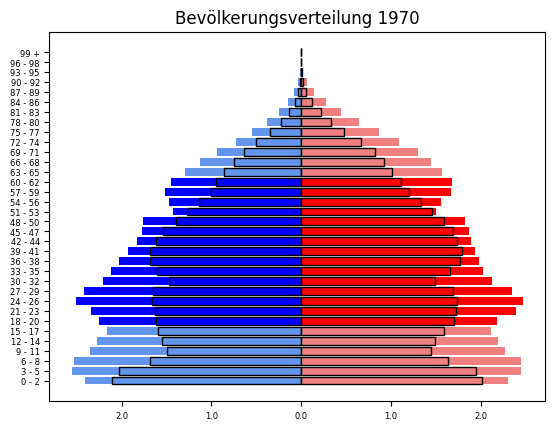

In [72]:
plt.rcParams.update({'font.size': 6})   # legt die generelle Schriftgrösse fest
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)
farben_m = ['cornflowerblue' if idx <= 5  # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5    # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 1970 rel'], 
         label='Männer 1970', color=farben_m)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 48 rel 70'], edgecolor='black', fill=False)


plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 1970 rel'], 
         label='Frauen 1970', color=farben_f)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 48 rel 70'], edgecolor='black', fill=False)

# formatiert die x-Achse mit positiven Werten
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
plt.title('Bevölkerungsverteilung 1970', fontsize=12)
plt.show()

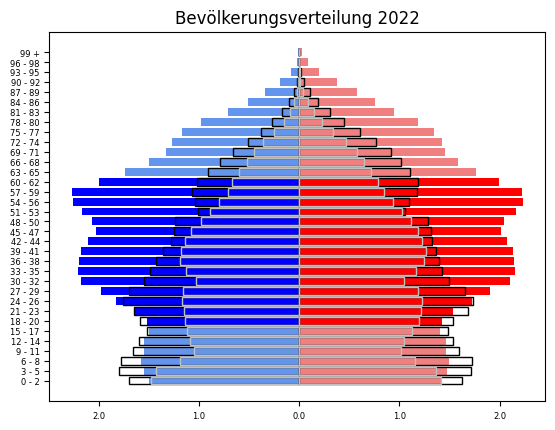

In [74]:
plt.rcParams.update({'font.size': 6})   # legt die generelle Schriftgrösse fest
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)
farben_m = ['cornflowerblue' if idx <= 5  # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5    # dimmt die Farben der nicht Erwerbstätigen
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 2022 rel'], 
         label='Männer 2022', color=farben_m)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 70 rel 22'], edgecolor='black', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 48 rel 22'], edgecolor='silver', fill=False)


plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 2022 rel'], 
         label='Frauen 2022', color=farben_f)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 70 rel 22'], edgecolor='black', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 48 rel 22'], edgecolor='silver', fill=False)

# formatiert die x-Achse mit positiven Werten
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
plt.title('Bevölkerungsverteilung 2022', fontsize=12)
plt.show()